In [1]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('./Products.csv')
print(df.head(5))
dw=df.copy()
n = dw.nunique(axis=0)
print(n)

   Product Id Weight (kg) Length (m) Width (m) Height (m)
0       44331       1.025     0.2286    0.1524     0.0508
1       44352       0.504       0.14      0.04       0.16
2       44373       0.488      0.105     0.105      0.075
3       44394      1.0028       0.11      0.11       0.15
4       44415        0.55       0.13      0.13       0.11
Product Id     3058
Weight (kg)     591
Length (m)      142
Width (m)       117
Height (m)      162
dtype: int64


In [4]:
# let's inspect attribute/feature raw data types
dw.dtypes

Product Id      int64
Weight (kg)    object
Length (m)     object
Width (m)      object
Height (m)     object
dtype: object

In [5]:
#is product_id unique
dw['Product Id'].is_unique


True

In [6]:
#counting missing value in each column
missing_values_count = dw.isnull().sum()
print(missing_values_count)

Product Id     0
Weight (kg)    4
Length (m)     5
Width (m)      2
Height (m)     4
dtype: int64


In [7]:

id_nw=dw[dw['Weight (kg)'].isna()]
id_nl=dw[dw['Length (m)'].isna()]
id_nwe=dw[dw['Width (m)'].isna()]
id_nh=dw[dw['Height (m)'].isna()]
Id_N=list(id_nw['Product Id'].values)+list(id_nl['Product Id'].values)+list(id_nwe['Product Id'].values)+list(id_nh['Product Id'].values)
print('Product Id containg NaN values')
print(Id_N)
print()

print('row/record values contaning nan values')
print(dw[dw.isna().sum(axis=1)>0])

Product Id containg NaN values
[45024, 46893, 48279, 53235, 45297, 50295, 50316, 51744, 55923, 49287, 57225, 46305, 47628, 52332, 128520]

row/record values contaning nan values
      Product Id Weight (kg) Length (m) Width (m) Height (m)
33         45024         NaN     0.1143    0.2286     0.0762
46         45297       0.022        NaN      0.16       0.07
94         46305       1.004       0.26      0.19        NaN
122        46893         NaN       0.16      0.12       0.03
157        47628       0.144       0.06      0.05        NaN
188        48279         NaN       0.14      0.09     0.1524
236        49287       0.278       0.13       NaN       0.13
284        50295           0        NaN         0          0
285        50316       0.005        NaN      0.09       0.03
353        51744           0        NaN         0          0
381        52332         1.9        0.1       0.1        NaN
424        53235         NaN       0.08      0.08      0.102
552        55923       0.012 

In [8]:
#Finding the product_Id with wrongly inputted string
s=[]
Id=[]
def find_of(ss):
  l=[]
  id=[]
  for i in range(1,3058):
    if dw[ss][i]:
      try:
        dw[ss][i]=float( dw[ss][i])
      except ValueError:
        #print ("error on line",i)
        l.append(dw[ss][i])
        id.append(dw['Product Id'][i])
        #print(df['Length (m)'].iloc[[i]])
  return [l, id]
p=find_of('Weight (kg)')
q=find_of('Length (m)')
r=find_of('Width (m)')
t=find_of('Height (m)')
s=p[0]+q[0]+r[0]+t[0]

Id=p[1]+q[1]+r[1]+t[1]
print('list of wrongly inputted string')
print(s)
print()
print('product id with wrongly inputted string')
print(Id)
print('total',len(Id))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


list of wrongly inputted string
['aa', 'gg', '@', ')', '?', '?', 'ee', 'ee', 'gg', '(', '.', '[', 'dd', 'jj', '!!', '%', '^', '.', '“', 'ss', '&', '*', '|']

product id with wrongly inputted string
[58422, 65226, 68691, 76524, 77301, 80073, 60312, 62370, 63483, 74634, 82110, 89208, 59598, 65919, 67956, 70203, 73101, 80640, 84000, 59199, 71169, 72177, 85197]
total 23


In [9]:
#here
#wrongly inputted string and alphnumeric charaters are na_values
df1 = pd.read_csv('./Products.csv', na_values=s)

In [10]:
print('missing value before detecting wrong string')
missing_values_count = dw.isnull().sum()
print(missing_values_count)
print()
print('wrong string is now na_values')
db=df1.copy()
missing_values_count = db.isnull().sum()
print(missing_values_count)

missing value before detecting wrong string
Product Id     0
Weight (kg)    4
Length (m)     5
Width (m)      2
Height (m)     4
dtype: int64

wrong string is now na_values
Product Id      0
Weight (kg)    10
Length (m)     11
Width (m)       9
Height (m)      8
dtype: int64


In [11]:
#so we've 15 null values and 23 wrong value
#primarily 38 missing values
#convert data in numeric format
fd=db[['Product Id','Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)']].apply(pd.to_numeric, errors='coerce')
fd.describe() #inspect descrptive statistics

,Product Id,Weight (kg),Length (m),Width (m),Height (m)
count,3058.000000,3048.000000,3047.000000,3049.000000,3050.000000
mean,80284.284173,0.237837,0.135951,0.049192,0.067205
std,24714.197188,0.639705,3.558942,0.225342,0.219667
min,44331.000000,0.000000,0.000000,0.000000,0.000000
25%,60380.250000,0.000000,0.000000,0.000000,0.000000
50%,76429.500000,0.005750,0.010000,0.001000,0.005500
75%,92478.750000,0.256000,0.105000,0.075000,0.115000
max,129318.000000,10.070000,195.000000,12.000000,11.050000




```
#observation
#1st to 3rd quartile(25%-75%) range is much smaller than max value
#have some anomaly/outliers
#RobustScaler can penalize outliers
#increase value from zero reveals positive skewed distribution
#actual mean is higher than median
#data can't be normally tested
#thus imputaion by median could be applied, 'knn' is the 
#better option for impute small number of missing data points

```

In [12]:
#let's impute 38 missing values with knn
from sklearn.impute import KNNImputer

print('missing_value before imputation')
missing_values_count = fd.isnull().sum()
print(missing_values_count)
imputer = KNNImputer(n_neighbors= 5)
impute_with_5 = imputer.fit_transform(fd[['Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)']])
print("\nImpute with 5 Neighbour: \n", impute_with_5)


imputer = KNNImputer(n_neighbors= 4)
impute_with_4 = imputer.fit_transform(fd[['Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)']])

print("\n Impute with 4 Neighbours: \n", impute_with_4)
print()

nd=impute_with_5.copy() 
nd=pd.DataFrame(nd) #knn imputed dataset
nd.columns=['Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)']

print('missing value after imputation')
print(nd.isnull().sum())

missing_value before imputation
Product Id      0
Weight (kg)    10
Length (m)     11
Width (m)       9
Height (m)      8
dtype: int64

Impute with 5 Neighbour: 
 [[1.025  0.2286 0.1524 0.0508]
 [0.504  0.14   0.04   0.16  ]
 [0.488  0.105  0.105  0.075 ]
 ...
 [0.3    0.06   0.042  0.195 ]
 [0.     0.     0.     0.    ]
 [0.798  0.115  0.05   0.235 ]]

 Impute with 4 Neighbours: 
 [[1.025  0.2286 0.1524 0.0508]
 [0.504  0.14   0.04   0.16  ]
 [0.488  0.105  0.105  0.075 ]
 ...
 [0.3    0.06   0.042  0.195 ]
 [0.     0.     0.     0.    ]
 [0.798  0.115  0.05   0.235 ]]

missing value after imputation
Weight (kg)    0
Length (m)     0
Width (m)      0
Height (m)     0
dtype: int64


In [13]:

md=fd.copy()
kd=fd.copy()
bd=md[md.isna().sum(axis=1)>0]
print('before any imputation')
print(bd)
print()

#impute with median
md=md.fillna(md.median())
print('After median imputation')
ll=list(bd.index)
ij=0
cols=[1, 2, 3, 4]
for i in ll:
    print(i,' ', md.iloc[i, cols ])
    print()

  



before any imputation
      Product Id  Weight (kg)  Length (m)  Width (m)  Height (m)
33         45024          NaN      0.1143     0.2286      0.0762
46         45297        0.022         NaN     0.1600      0.0700
94         46305        1.004      0.2600     0.1900         NaN
122        46893          NaN      0.1600     0.1200      0.0300
157        47628        0.144      0.0600     0.0500         NaN
188        48279          NaN      0.1400     0.0900      0.1524
236        49287        0.278      0.1300        NaN      0.1300
284        50295        0.000         NaN     0.0000      0.0000
285        50316        0.005         NaN     0.0900      0.0300
353        51744        0.000         NaN     0.0000      0.0000
381        52332        1.900      0.1000     0.1000         NaN
424        53235          NaN      0.0800     0.0800      0.1020
552        55923        0.012         NaN     0.0100      0.0200
614        57225        0.766      0.2200        NaN      0.0200
671

0.23707815565729234 0.6386904395599513


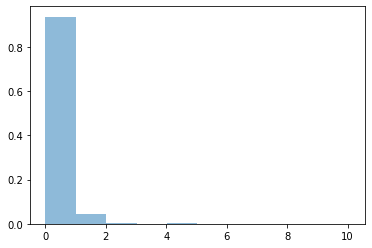

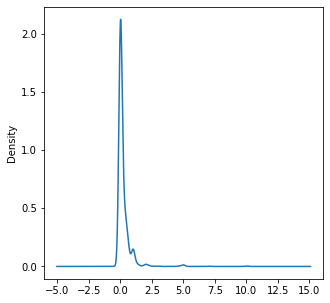

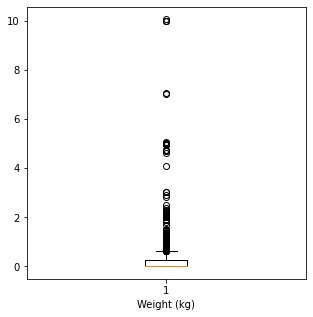

In [14]:
#let's visualize the data
#Positive skewed, mean is higher
#have some outliers
#Though data is not normal we test it find in scale

from scipy.stats import norm
# Fit a normal distribution to the Weight column:
mu, std = norm.fit(md['Weight (kg)'])
print(mu, std)
# Plot the histogram.
plt.hist(md['Weight (kg)'], bins=10, density=True, alpha=0.5)
plt.show()

plt.figure(figsize=(5,5))
md['Weight (kg)'].plot(kind='density')
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(md['Weight (kg)'])  
# show plot
plt.xlabel('Weight (kg)')
plt.show()

0.13549780902550687 3.551959785293534


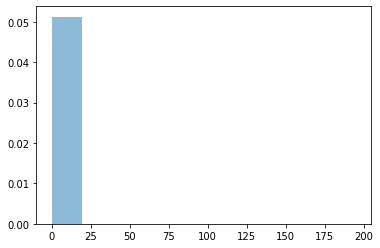

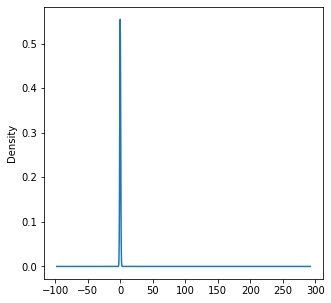

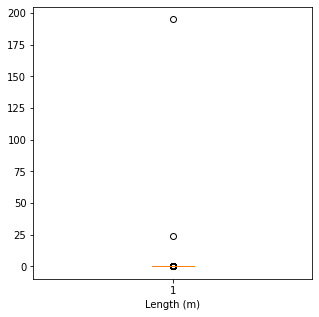

In [15]:
# Fit a normal distribution to the Length:
#high std, data is dispersed 
#has extrem outlier
mu, std = norm.fit(md['Length (m)'])
print(mu, std)
# Plot the histogram.
plt.hist(md['Length (m)'], bins=10, density=True, alpha=0.5)
plt.show()
plt.figure(figsize=(5,5))
md['Length (m)'].plot(kind='density')
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(md['Length (m)'])
# show plot
plt.xlabel('Length (m)')
plt.show()

0.049049967298888164 0.22498880316955042


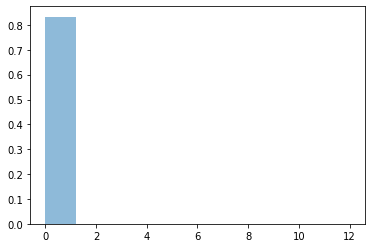

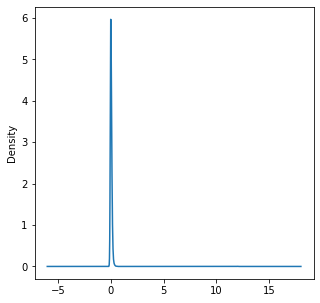

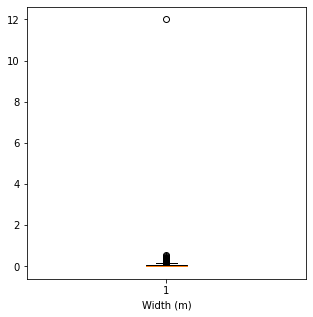

In [16]:
# Fit a normal distribution to the Width:
#high std, data is dispersed 
#has extrem outlier
mu, std = norm.fit(md['Width (m)'])
print(mu, std)
# Plot the histogram.
plt.hist(md['Width (m)'], bins=10, density=True, alpha=0.5)
plt.show()
plt.figure(figsize=(5,5))
md['Width (m)'].plot(kind='density')
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(md['Width (m)'])
plt.xlabel('Width (m)')
# show plot
plt.show()

0.0670438521909745 0.21936650830769408


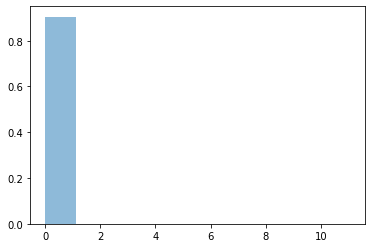

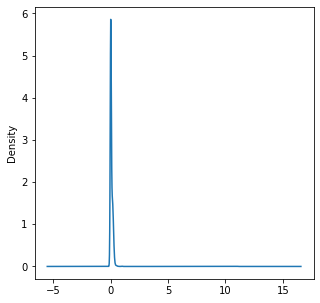

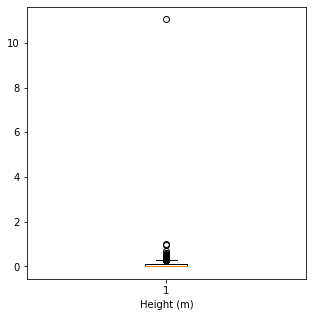

In [17]:
# Fit a normal distribution to the Height:
#high std, data is dispersed 
#has extrem outlier
mu, std = norm.fit(md['Height (m)'])
print(mu, std)
# Plot the histogram.
plt.hist(md['Height (m)'], bins=10, density=True, alpha=0.5)
plt.show()

plt.figure(figsize=(5,5))
md['Height (m)'].plot(kind='density')

fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(md['Height (m)'])
# show plot
plt.xlabel('Height (m)')
plt.show()

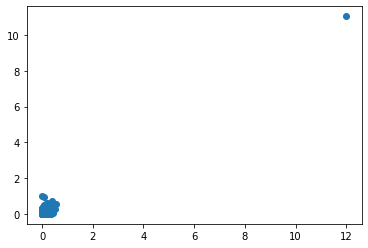

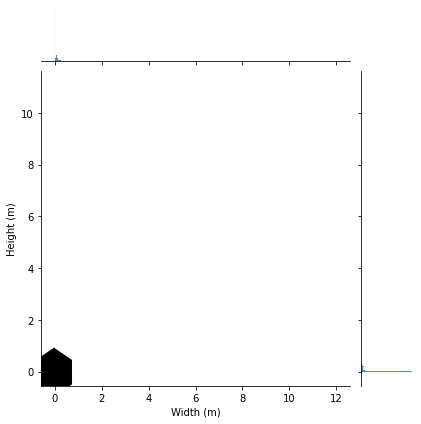

In [18]:

plt.scatter(md['Width (m)'], md['Height (m)'])
plt.show()

#very strong relationship
sns.jointplot(x =md['Width (m)'], y =md['Height (m)'], data = md, kind = 'hex', gridsize = 8);



```
# #Very good correlation between product width and height
#a regression can be fitted between these to impute one another
```



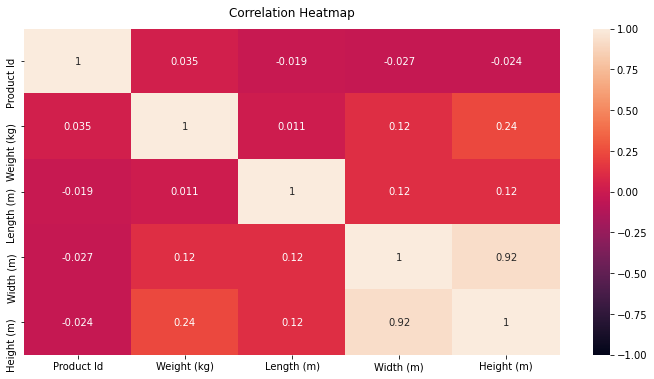

In [19]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(md.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);



```
#there are continues numeric data with rightly skewed
#Adaptive binning/quantizatin with rounding can be used to find data level #Quartile based binning scheme
#help to categorized tha data numerically(labeling) and modeling(Regression/classification)
#statistiacal tranformation Log_transform(except 0's), Box-Cox transform is also useful
#let's first find the 0's in data
```



In [20]:
#now find the product id where data point is 0 in any column
fd['Idz']=(fd == 0).astype(int).sum(axis=1)
Id_z1=[]
Id_z2=[] 
Id_z3=[]
Id_z4=[]
 
for i in range(1, 3058):
  if fd['Idz'][i]>0:
    if fd['Idz'][i]==4:
      Id_z4.append(fd['Product Id'][i])
    elif fd['Idz'][i]==3:
      Id_z3.append(fd['Product Id'][i])
    elif fd['Idz'][i]==2:
      Id_z2.append(fd['Product Id'][i])
    elif fd['Idz'][i]==1:
      Id_z1.append(fd['Product Id'][i])
    else:
      continue
  else:
    continue
 
print('Product Id where one(1) attribute contains 0 input')
print(len(Id_z1))
print(Id_z1)
print()
print('Product Id where two(2) attributes contains 0 input')
print(len(Id_z2))
print(Id_z2)
print()
print('Product Id where three(3) attributes contains 0 input')
print(len(Id_z3))
print(Id_z3)
print()
print('Product Id where all attributes contains 0 input')
print(len(Id_z4))
print(Id_z4)

Product Id where one(1) attribute contains 0 input
1
[52584]

Product Id where two(2) attributes contains 0 input
1
[126945]

Product Id where three(3) attributes contains 0 input
13
[50295, 51744, 54663, 68775, 68922, 75852, 80388, 83412, 84693, 85470, 91056, 121947, 126693]

Product Id where all attributes contains 0 input
1509
[44583, 44772, 44856, 44898, 44919, 44940, 45003, 45066, 45108, 45129, 45150, 45213, 45381, 45402, 45465, 45549, 45612, 45633, 45675, 45696, 45717, 45738, 45843, 45948, 46137, 46263, 46431, 46452, 46494, 46515, 46809, 46914, 46977, 46998, 47040, 47061, 47271, 47460, 47481, 47502, 47523, 47670, 47691, 47796, 47817, 47901, 47922, 47985, 48153, 48216, 48321, 48363, 48405, 48447, 48468, 48489, 48510, 48552, 48657, 48699, 48825, 48888, 48909, 49056, 49077, 49119, 49140, 49161, 49182, 49224, 49245, 49266, 49476, 49518, 49644, 49728, 49749, 49791, 49812, 49854, 50001, 50085, 50106, 50169, 50463, 50631, 50652, 50673, 50694, 50757, 50778, 50820, 50862, 50904, 50946, 51

In [21]:
#number of 0's in Weight column
wz=(fd['Weight (kg)'] == 0).astype(int).sum(axis=0)
print('number of 0s in weight column',wz)

#number of 0's in Length column
lz=(fd['Length (m)'] == 0).astype(int).sum(axis=0)
print('number of 0s in Length column',lz)

#number of 0's in Width column
wiz=(fd['Width (m)'] == 0).astype(int).sum(axis=0)
print('number of 0s in Width column',wiz)

#number of 0's in Height column
hz=(fd['Height (m)'] == 0).astype(int).sum(axis=0)
print('number of 0s in Height column',hz)
print()
#lets count percentage for 0 inputted data in a column
print('weight missing percentage {} %'.format(round(wz*100/3058,2)))
print('Length missing percentage {} %'.format(round(lz*100/3058,2)))
print('Width missing percentage {} %'.format(round(wiz*100/3058,2)))
print('Height missing percentage {} %'.format(round(hz*100/3058,2)))

#All Product id with NA, wrong_string_inp and wrong numeric input except outliers
#can be found empirically, domain knowledge is needed!
Id_All=set(Id_N+Id+Id_z1+Id_z2+Id_z3+Id_z4)

#number of unique_id
print(len(set(Id_All)))
#print(list(Id_All))

number of 0s in weight column 1511
number of 0s in Length column 1521
number of 0s in Width column 1523
number of 0s in Height column 1523

weight missing percentage 49.41 %
Length missing percentage 49.74 %
Width missing percentage 49.8 %
Height missing percentage 49.8 %
1560




```#Almost half of the data is missing
#A three factors anova test can be performed with non-missing data,
# finding the one dependent and three indpendent variables and identify the group states from all combination of three factors 
#to test which groups are non-similar or significance is higher, which is the percentages of randomly probable outcome, 
#if p is smaller than alpha then simple throw the test data and try to test non similar sample of groups,
# we'll add noise in the next section to add/augment or introduce variation and maximized MSE, 
#Modeling with these non-missing data might be used to impute dependent variable, 
#A k means with all data to find the number of product clusters, knn with small missing data, XGBoost could be applied!
```



In [22]:
#md dataset already imputed for primarily
#nan, and wrong string/alphanumeric issues
#only 0's are exist
md1=md.copy()

#fill all zero values with nan median imputed version
md2=md[["Weight (kg)","Length (m)","Width (m)","Height (m)"]].astype(str).replace('0.0',np.nan)

#fill all zero values with nan values knn imputed version
nd1=nd[["Weight (kg)","Length (m)","Width (m)","Height (m)"]].astype(str).replace('0.0',np.nan)
nd1=nd1.astype(float)


md3=md2.copy()
nD=md2.copy()
mds=md2.astype(float)

cc=md1.isnull().sum()
print(cc)


Product Id     0
Weight (kg)    0
Length (m)     0
Width (m)      0
Height (m)     0
dtype: int64




```
 #Simple Imputer for wrong numeric data and now for 0's
 #as outlier's can be deleted we'll do Quantaization/Adaptive binning
```



In [23]:
#let's define the function smliput for SimpleImpute
from sklearn.impute import SimpleImputer
from numpy import isnan
def smlimpt(sss):
  # split into input and output elements
  data = sss[['Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)']].values
  ix = [i for i in range(data.shape[1])]
  X= data[:, ix]

  # print total missing
  cc=sss.isnull().sum()
  print(cc)
  print()

  # define imputer
  imputer = SimpleImputer(strategy='mean')
  # fit on the dataset
  imputer.fit(data)
  # transform the dataset
#Xtrans = imputer.transform(X)
  data_trans = imputer.transform(data)
  data_trans_df=pd.DataFrame(data_trans)
  data_trans_df.columns=['Weight (kg)', 'Length (m)', 'Width (m)', 'Height (m)']
  #print(data_trans_df.head())
  print()
  # print total missing
  print('Missing: %d' % sum(isnan(data_trans).flatten()))
  print()
  return data_trans_df

In [24]:
data_trans_df=smlimpt(md2) #median imputed wrong + 0's are mean imputed SimpleImputer
print(data_trans_df.head())

Weight (kg)    1511
Length (m)     1521
Width (m)      1523
Height (m)     1523
dtype: int64


Missing: 0

   Weight (kg)  Length (m)  Width (m)  Height (m)
0       1.0250      0.2286     0.1524      0.0508
1       0.5040      0.1400     0.0400      0.1600
2       0.4880      0.1050     0.1050      0.0750
3       1.0028      0.1100     0.1100      0.1500
4       0.5500      0.1300     0.1300      0.1100


#Test other transformation

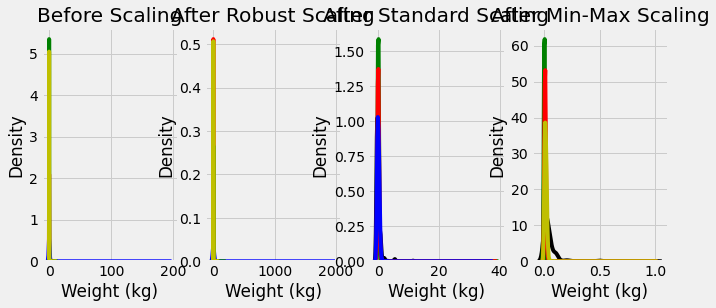

In [25]:
#lets DATA have a try with some other transformation
#but there was risk for assumption
#though not permitted to delete data we'll do it for inspection
#RobustScaler
#model between 1st and 3rd quartie
#outliers will be remove 
from sklearn import preprocessing
import seaborn as sns 
import matplotlib
% matplotlib inline
matplotlib.style.use('fivethirtyeight')
cols=['Weight (kg)', 'Length (m)','Width (m)','Height (m)']
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(md2[cols])
robust_scaled_df = pd.DataFrame(robust_df, columns =cols)

#either StandarScaler or
#MinMaxScaler
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(robust_scaled_df) #then, apply a standard Scaler on removed outlier
standard_df = pd.DataFrame(standard_df, columns =cols)

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(robust_scaled_df)
minmax_df = pd.DataFrame(minmax_df, columns =cols)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(10, 4))
ax1.set_title('Before Scaling')
  
sns.kdeplot(md['Weight (kg)'], ax = ax1, color ='r')
sns.kdeplot(md['Length (m)'], ax = ax1, color ='b')
sns.kdeplot(md['Width (m)'], ax = ax1, color ='g')
sns.kdeplot(md['Height (m)'], ax = ax1, color ='y')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_scaled_df['Weight (kg)'], ax = ax2, color ='red')
sns.kdeplot(robust_scaled_df['Length (m)'], ax = ax2, color ='blue')
sns.kdeplot(robust_scaled_df['Width (m)'], ax = ax2, color ='g')
sns.kdeplot(robust_scaled_df['Height (m)'], ax = ax2, color ='y')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['Weight (kg)'], ax = ax3, color ='black')
sns.kdeplot(standard_df['Length (m)'], ax = ax3, color ='g')
sns.kdeplot(standard_df['Width (m)'], ax = ax3, color ='r')
sns.kdeplot(standard_df['Height (m)'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['Weight (kg)'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['Length (m)'], ax = ax4, color ='g')
sns.kdeplot(minmax_df['Width (m)'], ax = ax4, color ='r')
sns.kdeplot(minmax_df['Height (m)'], ax = ax4, color ='y')
#plt.show()

#print(robust_scaled_df.head())

In [26]:
minmax_df.describe()
#print(minmax_df.head())

,Weight (kg),Length (m),Width (m),Height (m)
count,1547.000000,1537.000000,1535.000000,1535.000000
mean,0.046443,0.001372,0.008060,0.011998
std,0.082991,0.025683,0.025842,0.026701
min,0.000000,0.000000,0.000000,0.000000
25%,0.009832,0.000349,0.004084,0.003982
50%,0.024729,0.000528,0.006167,0.010046
75%,0.051346,0.000862,0.009084,0.017106
max,1.000000,1.000000,1.000000,1.000000


#Confidence interval for parmeter estimation

In [27]:
#let's find the range of values with 95% confidence level
#before binning
#may have wrong conclusion here
#data is not properly normal as it skewed
#check by imputed several version of the dataset

import numpy as np
import scipy.stats

def mean_confidence_interval(d, confidence=0.95):
    a = 1.0 * np.array(d)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
print('sklearn_imputer')
print(mean_confidence_interval(data_trans_df['Weight (kg)']))
print(mean_confidence_interval(data_trans_df['Length (m)']))
print(mean_confidence_interval(data_trans_df['Width (m)']))
print(mean_confidence_interval(data_trans_df['Height (m)']))


sklearn_imputer
(0.468639301874596, 0.44756871871613246, 0.48970988503305957)
(0.2695851008458035, 0.14371358478962942, 0.3954566169019776)
(0.09771648208469057, 0.08992815987014101, 0.10550480429924013)
(0.13356358306188928, 0.12615348764686019, 0.14097367847691838)


In [28]:
#we can see sklearn_imputer and minmax transformed data and knn imputed data
#have overlapped range, data may be drawn from same population

In [29]:
#Rather than anova a Rank sum test would be a better option
#whether two independent samples were drawn from a population with the same distribution
#Repeated tests and average to compare with population mean can be applied
#this section will be extended future and domain knowledge is preferrable

from scipy.stats import mannwhitneyu

def Mann_Whitney_U_Test(x,y):
  #random sampling for each variable with 358 samples
  stat, p = mannwhitneyu(x,y)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    print('Same distribution (fail to reject H0)')
  else:
    print('Different distribution (reject H0)')

Mann_Whitney_U_Test(data_trans_df['Weight (kg)'].sample(358), data_trans_df['Weight (kg)'].sample(358))
print()
Mann_Whitney_U_Test(data_trans_df['Length (m)'].sample(358), data_trans_df['Length (m)'].sample(358))
print()
Mann_Whitney_U_Test(data_trans_df['Width (m)'].sample(358), data_trans_df['Width (m)'].sample(358))
print()
Mann_Whitney_U_Test(data_trans_df['Height (m)'].sample(358), data_trans_df['Height (m)'].sample(358))


Statistics=63916.000, p=0.475
Same distribution (fail to reject H0)

Statistics=62973.500, p=0.333
Same distribution (fail to reject H0)

Statistics=64071.000, p=0.498
Same distribution (fail to reject H0)

Statistics=62301.500, p=0.245
Same distribution (fail to reject H0)


In [30]:
#we can see Height samples has different mean ensuring data grabed from different aspects/sources
#could be a dependent variable for classifying heights, (weights,width,length) can be independent variable
#to find the groups combinations  of those three factors and interactions on response or height variable for Anova
#repeated tests could outputs differnt results


In [31]:
 
 
#Adaptive binning/quantization and Rounding will help in right tailed scenario 
quantile_list = [0, .10, .20, .30, .50, .75, .85, .90,.95, 1.]
quantiles = data_trans_df['Weight (kg)'].quantile(quantile_list)
print(quantiles)
 
quantiles1 = data_trans_df['Length (m)'].quantile(quantile_list)
print(quantiles1)
 
quantiles2 = data_trans_df['Width (m)'].quantile(quantile_list)
print(quantiles2)
 
quantiles3 = data_trans_df['Height (m)'].quantile(quantile_list)
print(quantiles3)

0.00     0.001000
0.10     0.075700
0.20     0.184400
0.30     0.350000
0.50     0.468639
0.75     0.468639
0.85     0.483250
0.90     0.600000
0.95     1.010000
1.00    10.070000
Name: Weight (kg), dtype: float64
0.00      0.002000
0.10      0.065000
0.20      0.090000
0.30      0.130000
0.50      0.269585
0.75      0.269585
0.85      0.269585
0.90      0.269585
0.95      0.269585
1.00    195.000000
Name: Length (m), dtype: float64
0.00     0.001000
0.10     0.050000
0.20     0.065000
0.30     0.085000
0.50     0.097716
0.75     0.097716
0.85     0.100000
0.90     0.121500
0.95     0.165100
1.00    12.000000
Name: Width (m), dtype: float64
0.00     0.001000
0.10     0.037170
0.20     0.080000
0.30     0.133564
0.50     0.133564
0.75     0.133564
0.85     0.177800
0.90     0.205000
0.95     0.241555
1.00    11.050000
Name: Height (m), dtype: float64


Text(0, 0.5, 'Frequency')

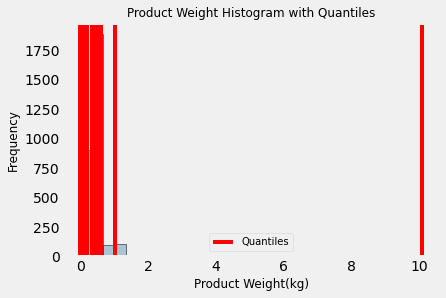

In [32]:
fig, ax = plt.subplots()
data_trans_df['Weight (kg)'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Product Weight Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Product Weight(kg)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

the red line here represent bin with potentials

In [33]:
pip install impyute

In [34]:
 
#Multiple imputation/MICE also a great option
from impyute.imputation.cs import mice
imputed = mice(mds.values)
 #change value columnwise
mice_mds=pd.DataFrame(imputed)
mice_mds.columns=['Weight (kg)','Length (m)','Width (m)','Height (m)']
print(mice_mds.describe())

       Weight (kg)   Length (m)    Width (m)   Height (m)
count  3058.000000  3058.000000  3058.000000  3058.000000
mean      0.468640     0.269333     0.098134     0.133816
std       0.594258     3.550024     0.219914     0.209068
min       0.001000    -0.454649     0.001000     0.001000
25%       0.250000     0.105000     0.075000     0.110000
50%       0.468640     0.269333     0.098134     0.133816
75%       0.468640     0.269333     0.098134     0.133816
max      10.070000   195.000000    12.000000    11.050000


In [35]:
#data_trans_df #median imputed + 0's mean imputed SimpleImputer
data_trans_df1=smlimpt(nd1) #knn imputed dataset + 0's mean imputed SimpleImputer
min_max_scaled_df=smlimpt(minmax_df) #median_imputed + min_max scaled

Weight (kg)    1511
Length (m)     1523
Width (m)      1523
Height (m)     1523
dtype: int64


Missing: 0

Weight (kg)    1511
Length (m)     1521
Width (m)      1523
Height (m)     1523
dtype: int64


Missing: 0



In [36]:
#now we can add noise to test with each version of the datset
#knn imputed dataset for primary null and wrong string and 0's are mean imputed SimpleImputer
#Quantile-based discretization function.

a = data_trans_df1['Weight (kg)']
b=data_trans_df1['Length (m)']
c=data_trans_df1['Width (m)']
d=data_trans_df1['Height (m)']

#add random noise to introduce more variation
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

w_deciles = pd.qcut(a + jitter(a), 
                    9, labels=False)
l_deciles = pd.qcut(b + jitter(a), 3, labels=False)
wi_deciles = pd.qcut(c + jitter(a), 3, labels=False)
h_deciles = pd.qcut(d + jitter(a), 4, labels=False)
#print(w_deciles)
#print(l_deciles)
#print(wi_deciles)
#print(h_deciles)

In [52]:
#concatnate to create the dataframe object
nnd=pd.concat([w_deciles,l_deciles,wi_deciles,h_deciles], axis=1)
#nnd=nnd.fillna(3)
print(nnd.head())


   Weight (kg)  Length (m)  Width (m)  Height (m)
0            8           1          2           0
1            7           0          0           3
2            7           0          2           0
3            8           0          2           3
4            7           0          2           0


In [56]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# split into input and output elements
data = nnd.values
ix = [i for i in range(data.shape[1]) if i != 1] 
X, y = data[:, ix], data[:, 1] #making Length dependent as it mostly dissimilar from others
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='most_frequent')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.687 (0.026)




```
#increasing k value in KNN imputer, 
#improving accuracy
#can be threshold by early stopping
```



>mean 0.687 (0.026)
>median 0.688 (0.026)
>most_frequent 0.687 (0.027)
>constant 0.687 (0.026)


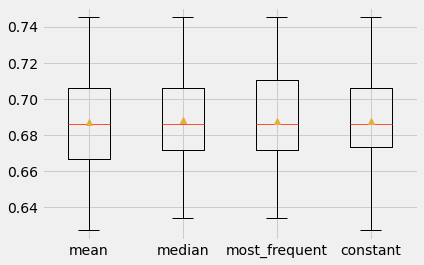

In [57]:
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# split into input and output elements
data = nnd.values
ix = [i for i in range(data.shape[1]) if i != 1]
X, y = data[:, ix], data[:, 1] #making Length dependent
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [59]:
#Empirical statistical testing and changing dependent and independent variables we can predict and then impute
#Values